In [2]:
# Importing necessary libraries

# Nearest neighbors will be the v1 model for sound drip
# will give logistic regressiona nd 
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from joblib import dump
from joblib import load
import pickle
import numpy as np

import pandas as pd
from pandas.io.json import json_normalize

# Loading Latest PKL

In [86]:
# song_list = pickle.load("./DF_genres_hashed.pkl","rb")

X = pickle.load(open("./data/song_list_v4_hashed.pkl", "rb"))

In [214]:
X["genres"].head()

0    ['finnish indie', 'suomi rock']                                                                 
1    ['bass music', 'scottish electronic', 'scottish hip hop', 'uk experimental electronic', 'wonky']
2    ['hip hop', 'new jack swing', 'rap']                                                            
3    ['bolero', 'mariachi', 'ranchera']                                                              
4    ['swedish indie rock']                                                                          
Name: genres, dtype: object

In [154]:
X.columns[0:20]

Index(['songid', 'popularity', 'availability', 'acousticness', 'artist',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'track', 'valence', 'genres', 'genres_stripped'],
      dtype='object')

# Remove two NaN Values

In [32]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_credentials_manager = SpotifyClientCredentials(client_id='63594c9b2f99411a8cbd18df04851fc4',client_secret='096168b2bd1f4378ae410726955c9ed8')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
def get_popularity(trackID):
    return sp.track(trackID)['popularity']

In [33]:
get_popularity('5gNNUKhBzakQrbu8UaLori')

18

In [34]:
X.loc[202786, 'popularity'] = 18

X.loc[202786]['popularity']

18

In [35]:
get_popularity('25DO8ImBd90EhKEKuntxqN')

0

In [36]:
X.loc[189355, 'popularity'] = 0

X.loc[189355]['popularity']

0

In [39]:
X["genres_stripped"]

0                             'finnish indie', 'suomi rock'
1         'bass music', 'scottish electronic', 'scottish...
2                        'hip hop', 'new jack swing', 'rap'
3                          'bolero', 'mariachi', 'ranchera'
4                                      'swedish indie rock'
                                ...                        
574013    'art pop', 'brooklyn indie', 'chamber pop', 'd...
574014                                        'lo-fi beats'
574015    'contemporary country', 'country pop', 'heartl...
574016    'garage rock', 'indie pop', 'indie rock', 'mod...
574017    'ccm', 'christian music', 'world worship', 'wo...
Name: genres_stripped, Length: 574018, dtype: object

# Picking Final Updated DF

In [42]:
# X = X.drop(["availability"], axis=1)

In [43]:
# filename2 = './data/song_list_v5_hashed.pkl'
# pickle.dump(X, open(filename2, 'wb'))

# Preparing for Scaling

In [44]:
# dropping unnecessary columns
X = X.drop(["songid","artist","track", "duration_ms","genres","genres_stripped"], axis=1)

# checking that they're dropped
X.shape

(574018, 63)

In [45]:
columns_for_scaling = X.columns[0:13]

In [46]:
columns_genre_hashed = X.columns[13:]

In [47]:
X[columns_for_scaling]

,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0,0.001300,0.487,0.678,0.055100,9.0,0.0846,-7.780,1.0,0.0495,149.940,4.0,0.8700
1,15,0.000045,0.662,0.823,0.952000,4.0,0.3430,-1.711,0.0,0.0662,177.745,4.0,0.6210
2,17,0.002760,0.859,0.741,0.000000,11.0,0.3250,-12.329,0.0,0.2710,98.082,4.0,0.5290
3,21,0.348000,0.361,0.483,0.000003,7.0,0.1770,-6.875,1.0,0.0287,94.538,4.0,0.6820
4,1,0.340000,0.533,0.302,0.179000,10.0,0.1110,-10.308,1.0,0.0307,134.959,3.0,0.2940
...,...,...,...,...,...,...,...,...,...,...,...,...,...
574013,33,0.798000,0.320,0.104,0.000750,0.0,0.1060,-13.162,1.0,0.0342,124.677,3.0,0.0566
574014,50,0.820000,0.418,0.204,0.936000,8.0,0.0866,-13.522,1.0,0.0370,110.022,4.0,0.0375
574015,0,0.070400,0.614,0.952,0.000000,6.0,0.3620,-2.782,1.0,0.0718,148.079,4.0,0.8200
574016,18,0.064000,0.343,0.487,0.000000,2.0,0.1070,-9.462,1.0,0.0473,171.217,4.0,0.3650


In [48]:
X[columns_genre_hashed]

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,-1.0,1.0,2.0,-3.0,0.0,0.0,0.0,0.0,-2.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,-4.0,5.0,7.0,-4.0,-1.0,0.0,0.0,0.0,-7.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,-3.0,0.0,1.0,-2.0,-1.0,0.0,0.0,0.0,-1.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,-2.0,1.0,2.0,-1.0,2.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574013,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,...,0.0,-6.0,1.0,9.0,-5.0,4.0,0.0,0.0,0.0,-1.0
574014,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-2.0
574015,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,-2.0,3.0,6.0,-4.0,5.0,0.0,0.0,0.0,0.0
574016,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,-6.0,2.0,10.0,-5.0,7.0,0.0,0.0,0.0,-1.0


In [49]:
# instantiating scaler
scaler = MinMaxScaler()

# scaling data
data_scaled = scaler.fit_transform(X[columns_for_scaling])

# confirming scaling took place
data_scaled[0]

array([0.        , 0.00130522, 0.4884654 , 0.678     , 0.0551    ,
       0.81818182, 0.0846    , 0.78720453, 1.        , 0.05118925,
       0.60009846, 0.8       , 0.87      ])

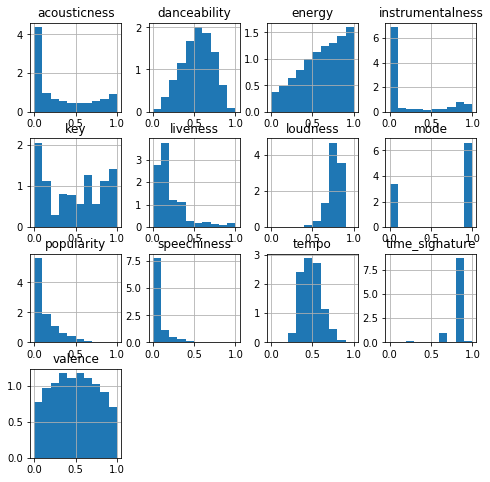

In [72]:
pd.DataFrame(data_scaled,columns=X[columns_for_scaling].columns).hist(figsize=(8,8), normed=True);

In [117]:
data_for_model = np.concatenate((data_scaled,genres_hashed_array),axis=1)

In [119]:
len(data_scaled)

574018

Data is scaled and ready to be fed to the model

# Normalization - Skipping for Now

In [61]:
import sys

In [62]:
np.set_printoptions(suppress=True)

In [65]:
data_scaled[7]

array([0.18556701, 0.85040161, 0.58375125, 0.0846    , 0.        ,
       1.        , 0.696     , 0.69854981, 1.        , 0.03660807,
       0.39780036, 0.8       , 0.396     ])

In [69]:
columns_for_normalization = columns_for_scaling

In [70]:
columns_for_normalization

Index(['popularity', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [67]:
normalizer = Normalizer()
data_normalized = normalizer.fit_transform(data_scaled)

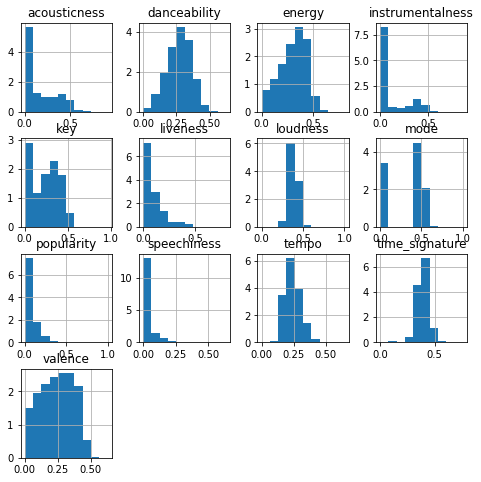

In [73]:
# Valence isn't scaled appropriately
# will have to scale before normalizing
pd.DataFrame(data_normalized,columns=columns_for_normalization).hist(figsize=(8,8), normed=True);

# K-Nearest Neighbors Classifier w/ Data scaled and Normalized

In [96]:
df = pickle.load(open("./data/song_list_v5_hashed.pkl", "rb"))

In [241]:
# instantiating model class
knn1 = NearestNeighbors(n_neighbors=10000,algorithm='kd_tree',n_jobs=-1)

# fitting model
model_1 = knn1.fit(data_normalized)

In [242]:
# running model to test output
knn_results1 = knn1.kneighbors([data_normalized[3]])[1]

In [217]:
knn_results1[0]

array([     3, 103114, 427498,   2653, 515450, 311079, 241037, 330833,
       346331,  39277, 144135,  91749, 396607,  40239, 242492, 459991,
       350315,  65513,  76613, 505378, 125948, 439239, 409866, 461501,
       241208, 120532, 456076, 399908, 467210, 519845,  33133,  51908,
       305966,  73546, 337775, 183143, 284303, 110600, 201367, 375735,
       194674, 328664,  87496,  31804, 386835,  33198, 133815, 438400,
       210177,   7133,  42098, 478932, 208735, 506087, 446943, 205353,
        37806,  12697,  35594, 229762, 193839, 154459, 278477, 283632,
        64200, 335947, 457477, 505754, 533849, 140875, 357702, 457931,
       461169, 419575, 345940, 301907, 160920, 323869,  97970, 263325,
       229685, 273509, 335166, 447856,  58242,  34638, 507884, 438459,
       243773, 214464, 428001, 306685, 141209, 500894,   7254,  14511,
       436016, 173300, 109217, 172678,  59762, 398825, 340779, 398123,
       461585, 309236, 313557, 360753, 278013,   4144, 381867, 225271,
      

In [136]:
pd.DataFrame(df.loc[1][0:19])

,1
songid,41RpZW2lxAdnqDd2nMBzLQ
popularity,15
acousticness,4.54e-05
artist,Hudson Mohawke
danceability,0.662
duration_ms,138960
energy,0.823
instrumentalness,0.952
key,4
liveness,0.343


In [137]:
pd.set_option('display.max_colwidth', -1)

/Users/user/.local/share/virtualenvs/model_notebooks-inW34qmC/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [ ]:
counter = 0
for result in knn_results1[0]:
    counter += 1
    print(counter)
    display(pd.DataFrame(df.loc[result][0:1]),pd.DataFrame(df.loc[result][1:2]),pd.DataFrame(df.loc[result][17:18]))

# Model w/ Scaling and no Normalization

In [118]:
# instantiating model class
knn2 = NearestNeighbors(n_neighbors=100,leaf_size=10,algorithm='kd_tree',n_jobs=-1)

# fitting model
model2 = knn2.fit(data_scaled)

In [119]:
# running model to test output
knn_results2 = knn2.kneighbors([data_scaled[1]])[1]

In [120]:
knn_results2[0]

array([     1, 492393, 238362, 407590, 198289,  36970,  68090, 350778,
       445580, 559862, 286524, 436810, 385085, 436203,  16849, 535388,
       219910, 372283, 270596, 108121,  83251,  19843, 241190, 227259,
       335130, 426570, 115150, 348317, 122467,  77680,  44924, 175401,
        31047, 192027,  67393, 192022, 290196,  93001, 536556, 424294,
       495177, 530514,   3059, 374535, 188406, 152024, 398253,   2173,
       447675, 281727, 133385,  79804, 317684, 178426, 150371, 341848,
        80351, 455944, 165375, 328948, 129014, 379048, 234488,   1776,
        65940,  24895, 214562, 356165, 107865, 571837, 507693, 376613,
       473138,  90146, 558559, 512272,  95139, 308586, 316062, 472939,
       349486, 516124, 405370, 474036,  75609, 108511,  97280, 308412,
       409037,  64344, 477824,  53375, 471270, 115529, 160272, 118815,
       455646,  75342, 228060, 282492])

In [124]:
pd.DataFrame(df.loc[1][1:18])

,1
popularity,15
acousticness,4.54e-05
artist,Hudson Mohawke
danceability,0.662
duration_ms,138960
energy,0.823
instrumentalness,0.952
key,4
liveness,0.343
loudness,-1.711


In [125]:
counter = 0 
for result in knn_results2[0]:
    counter += 1 
    print(counter)
    display(pd.DataFrame(df.loc[result][0:1]),pd.DataFrame(df.loc[result][17:18]))

1


,1
songid,41RpZW2lxAdnqDd2nMBzLQ


,1
genres,"['bass music', 'scottish electronic', 'scottish hip hop', 'uk experimental electronic', 'wonky']"


2


,492393
songid,0O3db9x93twYwR8ckduDc2


,492393
genres,"['drum and bass', 'liquid funk', 'uk dnb']"


3


,238362
songid,23z6WXALRFTeEwA25kQJNT


,238362
genres,"['electropop', 'metropopolis', 'swedish alternative rock', 'swedish electropop', 'swedish pop']"


4


,407590
songid,1uHmO3Uo9pkJ8uii3f8E9y


,407590
genres,"['darkstep', 'drum and bass', 'liquid funk', 'neurofunk']"


5


,198289
songid,4QxWH1nRVPlThJUGi8XlaQ


,198289
genres,"['electro jazz', 'nu jazz']"


6


,36970
songid,1EyR9ykNVYuhBiMi14Bg7x


,36970
genres,"['alternative hip hop', 'boom bap', 'east coast hip hop', 'hardcore hip hop', 'hip hop', 'queens hip hop', 'turntablism']"


7


,68090
songid,3GlkjwXjM5Bgfz4lNfbFUz


,68090
genres,"['dub', 'reggae', 'rock steady', 'roots reggae', 'ska']"


8


,350778
songid,4QVcr63WEHP9ofwDs3vAhn


,350778
genres,"['drill and bass', 'electronica', 'glitch', 'indietronica', 'intelligent dance music', 'microhouse', 'minimal techno']"


9


,445580
songid,4iB8tsFTPqOAnrCBsz3Baa


,445580
genres,"['chillhop', 'downtempo', 'electronica', 'ninja', 'nu jazz', 'turntablism']"


10


,559862
songid,5570AOqQfWpmHAcRVywpcE


,559862
genres,"['progressive house', 'progressive trance', 'uplifting trance']"


11


,286524
songid,6t9aQLS7yu3Wwl0cNyVEy1


,286524
genres,"['deep jazz fusion', 'jazz fusion']"


12


,436810
songid,03cIxujvTyV0sNShMoONGH


,436810
genres,"['downtempo', 'livetronica', 'new tribe', 'psychedelic trance', 'psychill']"


13


,385085
songid,4DHZWAshPCZkYHC64UoLeK


,385085
genres,"['electro jazz', 'electro swing', 'electronica', 'nu jazz']"


14


,436203
songid,2bx3heulXGe3D2MoICVw8F


,436203
genres,"['reggae en espanol', 'spanish reggae']"


15


,16849
songid,3rnPBNAI86ZA824Z2qKKvV


,16849
genres,"['rock steady', 'ska', 'ska punk', 'ska revival', 'traditional ska']"


16


,535388
songid,2biS8aAzmYUl6cIbJKkxrL


,535388
genres,"['chillhop', 'jazz boom bap']"


17


,219910
songid,2W47xulOCbukZ2AGpVcRD2


,219910
genres,"['lovers rock', 'rock steady']"


18


,372283
songid,0BV1LAbrGT5O7xy0gGA3QW


,372283
genres,['comic']


19


,270596
songid,4FH66inNFuz51Am43PepjY


,270596
genres,"['nu skool breaks', 'progressive house', 'progressive trance', 'tech house', 'trance', 'uplifting trance']"


20


,108121
songid,51gRkY2DI0otFhE1hBuADq


,108121
genres,"['instrumental rock', 'jazz fusion', 'neo classical metal', 'shred']"


21


,83251
songid,1q9x3FJA68n4HPuBeYHgL0


,83251
genres,"['drum and bass', 'drumfunk', 'liquid funk', 'uk dnb']"


22


,19843
songid,7DdRwUDV79pDhdbLBmfSuD


,19843
genres,"['classic norwegian pop', 'norwegian hip hop', 'norwegian pop', 'norwegian pop rap']"


23


,241190
songid,1KXjC29ZCaxHj38UVnodaX


,241190
genres,"['electro house', 'electronica', 'filter house', 'turntablism']"


24


,227259
songid,7hrunPbxAuvcHp7WWkyTIB


,227259
genres,"['dance pop', 'pop']"


25


,335130
songid,3No8LQDPgZxlL0RMZqmaxe


,335130
genres,"['drum and bass', 'jump up', 'liquid funk', 'uk dnb']"


26


,426570
songid,3LbbvQGOvVp8pobqRc1kLF


,426570
genres,"['bubble trance', 'eurodance']"


27


,115150
songid,4AH6oaTOJuPELsf0TnhmSz


,115150
genres,"['dance pop', 'funk', 'hip pop', 'minneapolis sound', 'neo soul', 'new jack swing', 'quiet storm', 'r&b', 'soul', 'urban contemporary']"


28


,348317
songid,2koTAFQSkzot94h5qwpJWL


,348317
genres,['electro']


29


,122467
songid,6Te8oM4RYiPlI1oeacdEYV


,122467
genres,"['psychedelic trance', 'psychill']"


30


,77680
songid,1IF92DM9GgWH5ULGzRyXNL


,77680
genres,"['progressive electro house', 'progressive house']"


31


,44924
songid,2PIBj3Jnq9JdYxHyj6RCOp


,44924
genres,"['acid house', 'ambient industrial', 'art rock', 'british experimental', 'experimental', 'experimental pop', 'experimental rock', 'industrial', 'industrial rock', 'no wave', 'post-punk', 'uk post-punk']"


32


,175401
songid,1evg97yUsUGcqUcF2Wu5NX


,175401
genres,"['full on', 'psychedelic trance']"


33


,31047
songid,4unb6ADqEgpWMZLZDvLBWZ


,31047
genres,"['full on', 'psychedelic trance']"


34


,192027
songid,3doXbHOT1JiQ206W7iDiQm


,192027
genres,['psychobilly']


35


,67393
songid,7MUVlI2my9eh78SGEBzF8M


,67393
genres,['full on']


36


,192022
songid,0heb17V634CHk3dSs0wwJM


,192022
genres,"['frankfurt electronic', 'future ambient']"


37


,290196
songid,7d48jP41HpLwLZmhlGnCVN


,290196
genres,"['alternative dance', 'art pop', 'dance pop', 'dance-punk', 'electronica', 'electropop', 'indie pop', 'indie rock', 'indietronica', 'modern rock', 'neo-synthpop', 'new rave']"


38


,93001
songid,22gpJ3mnSYHm964wFPNgeW


,93001
genres,"['ambient psychill', 'psychill']"


39


,536556
songid,0Ty7IbVJ1Akz2nNAuJamNK


,536556
genres,"['anime latino', 'otacore']"


40


,424294
songid,5XiJcaYeIow7p4FNBHnvqv


,424294
genres,"['deep jazz fusion', 'jazz fusion']"


41


,495177
songid,1G9l5r5Fc65J7DZPAEk5lA


,495177
genres,"['catstep', 'kawaii future bass', 'otacore']"


42


,530514
songid,6brdygAtfqp3KDceaBLDZv


,530514
genres,"['dub', 'reggae', 'roots reggae']"


43


,3059
songid,0YxSPBjfwyltJUXNEamEgE


,3059
genres,"['drum and bass', 'drumfunk']"


44


,374535
songid,6hj8L363YVCscXVRILBVtf


,374535
genres,"['deep euro house', 'deep melodic euro house', 'electronica', 'german techno', 'microhouse', 'minimal techno', 'tech house']"


45


,188406
songid,1x57SgOFVVsnbd5pHNhWaa


,188406
genres,"['darkstep', 'drum and bass', 'drumfunk', 'jump up', 'jungle', 'liquid funk', 'neurofunk']"


46


,152024
songid,7bWezp3aTeqfhq0x3MAhMi


,152024
genres,['chill lounge']


47


,398253
songid,6LYKw8uhVDZdqvxMsSCEuq


,398253
genres,['neue deutsche harte']


48


,2173
songid,7fjAPSJksOCN0ygmqEIgtD


,2173
genres,"['belgian dance', 'bubble trance', 'hard trance']"


49


,447675
songid,4OiW5Ujm0y4HMJTicCL2Dl


,447675
genres,['psychedelic trance']


50


,281727
songid,2CMAkzRjMHG7ULqmF2iqmU


,281727
genres,"['eurodance', 'europop', 'german techno', 'hamburg electronic', 'happy hardcore']"


51


,133385
songid,2nhlIS8mhj7UyUAUrcuabv


,133385
genres,"['bubblegum dance', 'eurodance', 'europop', 'happy hardcore', 'hip house']"


52


,79804
songid,6RXHSBZWpgZ2iRozOXfIVT


,79804
genres,"['dub', 'old school dancehall', 'reggae', 'roots reggae']"


53


,317684
songid,73eysAGtkuXyl15QlucwcD


,317684
genres,"['french folk pop', 'french reggae']"


54


,178426
songid,4t8rpBjDDBGZRKsTDlJq30


,178426
genres,"['dance pop', 'hip pop', 'neo soul', 'new jack swing', 'pop', 'r&b', 'urban contemporary']"


55


,150371
songid,6PE0gIJKArADECvHY286Eu


,150371
genres,['psychobilly']


56


,341848
songid,2P0YHEOsVboMyiJPukdfbN


,341848
genres,"['drum and bass', 'drumfunk', 'hardcore techno', 'jungle', 'liquid funk', 'neurofunk']"


57


,80351
songid,1HxV5s7gpOvGFAk68CPvcP


,80351
genres,"['ebm', 'electro-industrial', 'industrial', 'industrial metal', 'industrial rock']"


58


,455944
songid,26IODLdVuaONDA8uHFAhu5


,455944
genres,['hard house']


59


,165375
songid,3f03B6ehOkMFKRsJAhIiFi


,165375
genres,"['drum and bass', 'hardcore techno', 'jump up', 'jungle', 'liquid funk', 'neurofunk']"


60


,328948
songid,2ZaXLzHWErIaDYFOsHNEr7


,328948
genres,"['drum and bass', 'jump up', 'jungle']"


61


,129014
songid,2dqCUMijqXQRWkgLQA4ZSF


,129014
genres,"['french folk pop', 'french reggae', 'french rock']"


62


,379048
songid,5Ovi49OyON7iZtwWOCRcro


,379048
genres,"['bass music', 'dubstep', 'future garage']"


63


,234488
songid,7vtcfTfzRK364hF8MjXF5f


,234488
genres,"['modern blues rock', 'rebel blues']"


64


,1776
songid,6wup1qjT4xcqC3bmAdYT68


,1776
genres,"['acid house', 'big beat', 'britpop', 'hardcore techno', 'hip house']"


65


,65940
songid,7ksjlfxrBOTANBkW3KwCcD


,65940
genres,"['alternative hip hop', 'boom bap', 'hardcore hip hop', 'hip hop', 'southern hip hop', 'underground hip hop', 'west coast rap']"


66


,24895
songid,5WeEC45OZAYw3DEqvRL6wf


,24895
genres,"['dance pop', 'deep house', 'disco house', 'diva house', 'electropop', 'tribal house', 'vocal house']"


67


,214562
songid,33finv9Rn8YMD8ysKrBoGf


,214562
genres,"['ambient idm', 'future ambient', 'icelandic electronic']"


68


,356165
songid,0pPm7VVxYD1756xQf2zWCX


,356165
genres,"['big beat', 'disco house', 'electronica', 'nu jazz', 'nu skool breaks', 'trip hop']"


69


,107865
songid,4iUxszOwMH0sWXGbZp5yJG


,107865
genres,"['big beat', 'drum and bass', 'drumfunk', 'hardcore techno', 'jungle', 'liquid funk', 'neurofunk']"


70


,571837
songid,4zgyiw85TCmMqv3YIM7Iw1


,571837
genres,"['edm', 'progressive house', 'trance']"


71


,507693
songid,5bDSKhE2YfkAoaUua5oB1b


,507693
genres,"['deep big room', 'sky room', 'ukrainian electronic']"


72


,376613
songid,4aCC4bRL6EaxhDmkaUB82Y


,376613
genres,"['aggrotech', 'dark wave', 'ebm', 'electro-industrial', 'futurepop', 'industrial metal']"


73


,473138
songid,79t9V5uBly5gDrR2BA8xzr


,473138
genres,"['darkstep', 'drum and bass', 'liquid funk', 'neurofunk']"


74


,90146
songid,6ToJlSW2iFhZ9q6UNkfHhM


,90146
genres,"['edm', 'progressive house', 'progressive trance', 'trance', 'uplifting trance']"


75


,558559
songid,5aHycZ0nZntwe4cZ35xjW9


,558559
genres,"['chillhop', 'jazz boom bap']"


76


,512272
songid,0Q5xSNgSoHStZh9OuSAat1


,512272
genres,['filthstep']


77


,95139
songid,3qx0e7BAXSR02fBE0GKTeo


,95139
genres,"['album rock', 'art rock', 'blues', 'blues rock', 'british blues', 'classic rock', 'country rock', 'electric blues', 'hard rock', 'instrumental rock', 'jazz fusion', 'psychedelic rock', 'rock', 'symphonic rock']"


78


,308586
songid,2bWO7OmLDzFu0euHbL8llO


,308586
genres,"['big beat', 'breakbeat', 'nu skool breaks']"


79


,316062
songid,4nfdcxu7Kvkr2bcKxfnZyP


,316062
genres,['shred']


80


,472939
songid,08QAQKnYmDBFXizDOo6Y11


,472939
genres,['go-go']


81


,349486
songid,3eVYfJhSs5l12XODwVUrUd


,349486
genres,['bhangra']


82


,516124
songid,0F06y0CnyAirXcwDLrAgdd


,516124
genres,"['dancehall', 'lovers rock', 'modern reggae', 'reggae fusion', 'roots reggae']"


83


,405370
songid,4FXAJnhK56W3CFI2i3GM3p


,405370
genres,['native american']


84


,474036
songid,0h4bPjg9SjH3VtHQv0obve


,474036
genres,"['jazz funk', 'philly soul', 'post-disco', 'rare groove', 'soul jazz']"


85


,75609
songid,1GA5a4fprKfOhfoM0RI5iw


,75609
genres,"['acid trance', 'bubble trance']"


86


,108511
songid,5FxXyneQTWwMhulNQHhkhG


,108511
genres,"['art rock', 'canterbury scene', 'instrumental rock', 'jazz fusion', 'progressive rock', 'space rock', 'symphonic rock']"


87


,97280
songid,1MhOuY6bFKytttnkI7hBW8


,97280
genres,"['breakbeat', 'nu skool breaks']"


88


,308412
songid,740aJl0dXizuT0n6FUPOrJ


,308412
genres,['full on']


89


,409037
songid,5BLtLQ36xpiOAGeTVkN3Bd


,409037
genres,"['dub', 'reggae', 'roots reggae']"


90


,64344
songid,6zAzAZ7ItRMxLOsBrFjXMn


,64344
genres,"['tribal house', 'vocal house']"


91


,477824
songid,2qnGKUx8HwEMW9oupiGQVe


,477824
genres,"['belly dance', 'world fusion']"


92


,53375
songid,74OODQkvA158vQKMTiIroe


,53375
genres,"['full on', 'psychedelic trance']"


93


,471270
songid,3l163iVj6zicfobvyugsGj


,471270
genres,"['bouncy house', 'happy hardcore']"


94


,115529
songid,16IyKYjV9zIPggsfooBGtl


,115529
genres,"['ethereal wave', 'medieval folk', 'neoclassical', 'world fusion']"


95


,160272
songid,4Psd31O7OyDY1AikRx5vIH


,160272
genres,"['progressive trance house', 'uplifting trance']"


96


,118815
songid,0nY8o3P1SreT9RU1VxeUOF


,118815
genres,"['big beat', 'breakbeat', 'drum and bass', 'liquid funk', 'nu skool breaks']"


97


,455646
songid,1IIxcARDZdHEjM6bgbcssC


,455646
genres,"['scottish techno', 'techno']"


98


,75342
songid,5kV71wJicISVn08Gx0fCHB


,75342
genres,"['deep progressive trance', 'organic electronic']"


99


,228060
songid,4Y7g9Z5FoWfyp8XOgiuk87


,228060
genres,"['canadian folk', 'canadian singer-songwriter', 'folk', 'folk rock', 'lilith', 'mellow gold', 'pop rock', 'rock', 'singer-songwriter', 'traditional folk']"


100


,282492
songid,0p9iglf7k9x5x7w9hG8uhC


,282492
genres,"['instrumental rock', 'philly indie']"


# Filtering KK For Shared Genres

In [ ]:
#loop takes KNN results and filters by source track genres

filtered_list = []
source_song_index = knn_results1[0][0]
source_genre_list = df.loc[source_song_index]["genres_stripped"].split(",")
# print("source_genre_list created")
for source_genre in source_genre_list:
    source_genre = source_genre.strip(' ')
#     print("source_genre_created")
    for output_song_index in knn_results1[0][1:]:
        output_genre_list = df.loc[output_song_index]["genres_stripped"].split(",")
#         print("output_genre_list created")
        for output_genre in output_genre_list:
            output_genre = output_genre.strip(' ')
#             print("output_genre_created")
            if source_genre == output_genre:
                print(output_song_index,source_genre,output_genre)
                filtered_list.append(output_song_index)

In [222]:
filtered_list.insert(0,3)

In [ ]:
filtered_list

In [243]:
filtered_lists = []
knn_result_ouputs = knn_results1[0][1:]
for source_song_index in range(100,200):
    filtered_list = []
    source_genre_list = df.loc[source_song_index]["genres_stripped"].split(",")
    # print("source_genre_list created")
    for source_genre in source_genre_list:
        source_genre = source_genre.strip(' ')
    #     print("source_genre_created")
        for output_song_index in knn_result_ouputs:
            output_genre_list = df.loc[output_song_index]["genres_stripped"].split(",")
    #         print("output_genre_list created")
            for output_genre in output_genre_list:
                output_genre = output_genre.strip(' ')
    #             print("output_genre_created")
                if source_genre == output_genre:
#                     print(output_song_index,source_genre,output_genre)
                    filtered_list.append(output_song_index)
    filtered_lists.append(filtered_list)

In [244]:
nineteen_tracks = 0 
for filtered_list in filtered_lists:
    if len(filtered_list) > 19:
        nineteen_tracks += 1
print(nineteen_tracks / 100)

0.71


1000 = 38%
 X   = 150%

In [233]:
150 / 38

3.9473684210526314

In [234]:
1000 * 4

4000

In [224]:
counter = 0
for index in filtered_list:
    counter += 1
    print(counter)
    display(pd.DataFrame(df.loc[index][0:1]),pd.DataFrame(df.loc[index][1:2]),pd.DataFrame(df.loc[index][17:18]))
    

1


,3
songid,0kq75szR7uDEYrZkT2c4Ry


,3
popularity,21


,3
genres,"['bolero', 'mariachi', 'ranchera']"


2


,33198
songid,0o4kWRJYKRrUrBlI5JgVvL


,33198
popularity,26


,33198
genres,"['bolero', 'cancion melodica', 'latin pop', 'pop romantico']"


3


,4144
songid,2SR4yit0tsFram1SD0ifTn


,4144
popularity,26


,4144
genres,"['bolero', 'bolero cubano', 'cuban rumba', 'latin jazz', 'mambo']"


4


,466101
songid,6oXR7bSMlhAB8dvmXKEPBM


,466101
popularity,22


,466101
genres,"['bolero', 'latin pop', 'pop romantico']"


5


,329786
songid,6xw2uoi46il0lDbqMeCEgU


,329786
popularity,20


,329786
genres,"['bolero', 'cancion melodica', 'grupera', 'latin', 'latin pop', 'ranchera']"


6


,468280
songid,1MvPqtm3uT8s8yCZegIOFH


,468280
popularity,7


,468280
genres,['bolero']


7


,227854
songid,65fUAOPDY5iVsVi292AVHA


,227854
popularity,28


,227854
genres,"['bolero', 'grupera', 'mariachi', 'norteno', 'ranchera', 'regional mexican']"


8


,157411
songid,4qAz9LmmR0lug7tCtqhwq0


,157411
popularity,10


,157411
genres,"['bolero', 'bolero cubano', 'cuban rumba', 'latin jazz']"


9


,194472
songid,3Ieq59ODR95Mfvy9aE6JAY


,194472
popularity,28


,194472
genres,"['bolero', 'mariachi', 'ranchera']"


10


,99793
songid,6alMrtBMpBfVtwxCm4Jiol


,99793
popularity,10


,99793
genres,"['bolero', 'cancion melodica', 'cantautor', 'latin', 'latin pop', 'nueva cancion', 'ranchera', 'velha guarda']"


11


,65642
songid,3a9QpnHcG3KeLgv7Lhc6yy


,65642
popularity,36


,65642
genres,"['bolero', 'mariachi', 'ranchera']"


12


,109020
songid,0vHlm4RhntATMqCK4fyeyy


,109020
popularity,11


,109020
genres,"['bolero', 'mexican rock-and-roll', 'pop romantico', 'ranchera']"


13


,280748
songid,5bBCA8X81LQciZyw1gyFpl


,280748
popularity,23


,280748
genres,"['bolero', 'cuban rumba', 'latin jazz', 'world']"


14


,439449
songid,2CrwFR9V6mAbDhVr3co4uT


,439449
popularity,48


,439449
genres,"['bolero', 'mexican rock-and-roll', 'pop romantico', 'ranchera']"


15


,519519
songid,6vNZrdVZs24kvroVlG9QZk


,519519
popularity,14


,519519
genres,"['bolero', 'cumbia', 'grupera', 'latin pop', 'ranchera', 'rock en espanol']"


16


,446943
songid,2eXn5Gcnjo46V8AyEYJBoh


,446943
popularity,29


,446943
genres,"['grupera', 'latin talent show', 'mariachi', 'ranchera']"


17


,465637
songid,68ne2fO34nunHtwWnxFhMy


,465637
popularity,27


,465637
genres,"['banda', 'grupera', 'mariachi', 'norteno', 'ranchera', 'regional mexican']"


18


,25217
songid,7Je5iSwDPcfXP7O4uqc7fd


,25217
popularity,12


,25217
genres,"['mariachi', 'ranchera']"


19


,227854
songid,65fUAOPDY5iVsVi292AVHA


,227854
popularity,28


,227854
genres,"['bolero', 'grupera', 'mariachi', 'norteno', 'ranchera', 'regional mexican']"


20


,401778
songid,7fpMVZZuyXING0v0PldhUT


,401778
popularity,12


,401778
genres,"['mariachi', 'ranchera']"


21


,194472
songid,3Ieq59ODR95Mfvy9aE6JAY


,194472
popularity,28


,194472
genres,"['bolero', 'mariachi', 'ranchera']"


22


,391691
songid,1eJqj0zy8nvIA2l30Rb7nS


,391691
popularity,4


,391691
genres,"['mariachi', 'mexican son', 'ranchera']"


23


,65642
songid,3a9QpnHcG3KeLgv7Lhc6yy


,65642
popularity,36


,65642
genres,"['bolero', 'mariachi', 'ranchera']"


24


,242492
songid,0GMxAv3P0UsOfgC1zMNiDh


,242492
popularity,20


,242492
genres,"['grupera', 'mexican rock-and-roll', 'ranchera']"


25


,110600
songid,3DSD67YF3RjCehixA6H9pS


,110600
popularity,20


,110600
genres,"['grupera', 'mexican rock-and-roll', 'ranchera']"


26


,446943
songid,2eXn5Gcnjo46V8AyEYJBoh


,446943
popularity,29


,446943
genres,"['grupera', 'latin talent show', 'mariachi', 'ranchera']"


27


,507884
songid,4RYDckKpWq0qVcA3sQwDTY


,507884
popularity,6


,507884
genres,"['banda', 'cumbia', 'grupera', 'norteno', 'ranchera', 'regional mexican']"


28


,511978
songid,3h90bxq0iyRvg9q74HLydq


,511978
popularity,18


,511978
genres,"['banda', 'duranguense', 'grupera', 'norteno', 'ranchera', 'regional mexican', 'regional mexican pop']"


29


,465637
songid,68ne2fO34nunHtwWnxFhMy


,465637
popularity,27


,465637
genres,"['banda', 'grupera', 'mariachi', 'norteno', 'ranchera', 'regional mexican']"


30


,528561
songid,4rlQcD0PKtRb7lTola85ra


,528561
popularity,13


,528561
genres,"['banda', 'cumbia', 'grupera', 'norteno', 'ranchera', 'regional mexican']"


31


,325760
songid,4UlKO05YxFnEcFanfF3erv


,325760
popularity,34


,325760
genres,"['grupera', 'latin', 'latin arena pop', 'latin pop', 'mexican pop', 'ranchera']"


32


,72120
songid,7xEFQ6CUrxfN0S4hurH09v


,72120
popularity,14


,72120
genres,"['banda', 'cumbia', 'duranguense', 'grupera', 'norteno', 'ranchera', 'regional mexican']"


33


,522352
songid,4YymZTnrm5XJb8dVNdw04U


,522352
popularity,29


,522352
genres,"['banda', 'cumbia', 'grupera', 'norteno', 'ranchera', 'regional mexican']"


34


,329786
songid,6xw2uoi46il0lDbqMeCEgU


,329786
popularity,20


,329786
genres,"['bolero', 'cancion melodica', 'grupera', 'latin', 'latin pop', 'ranchera']"


35


,25217
songid,7Je5iSwDPcfXP7O4uqc7fd


,25217
popularity,12


,25217
genres,"['mariachi', 'ranchera']"


36


,37997
songid,1Rvp3rzf42DxuE14OyZ9rN


,37997
popularity,26


,37997
genres,"['banda', 'grupera', 'latin', 'latin pop', 'norteno', 'ranchera', 'regional mexican', 'tejano']"


37


,227854
songid,65fUAOPDY5iVsVi292AVHA


,227854
popularity,28


,227854
genres,"['bolero', 'grupera', 'mariachi', 'norteno', 'ranchera', 'regional mexican']"


38


,401778
songid,7fpMVZZuyXING0v0PldhUT


,401778
popularity,12


,401778
genres,"['mariachi', 'ranchera']"


39


,194472
songid,3Ieq59ODR95Mfvy9aE6JAY


,194472
popularity,28


,194472
genres,"['bolero', 'mariachi', 'ranchera']"


40


,391691
songid,1eJqj0zy8nvIA2l30Rb7nS


,391691
popularity,4


,391691
genres,"['mariachi', 'mexican son', 'ranchera']"


41


,527037
songid,6clD4BrKCI4hYBZe5ZHlG3


,527037
popularity,3


,527037
genres,"['banda', 'cumbia', 'grupera', 'norteno', 'ranchera', 'regional mexican']"


42


,321161
songid,4fL6FQODdz4tOk6ftWgiDH


,321161
popularity,4


,321161
genres,"['grupera', 'latin pop', 'ranchera']"


43


,496779
songid,2EFkr6XGUKbf2SI043vJXq


,496779
popularity,37


,496779
genres,"['grupera', 'latin', 'latin pop', 'ranchera']"


44


,99793
songid,6alMrtBMpBfVtwxCm4Jiol


,99793
popularity,10


,99793
genres,"['bolero', 'cancion melodica', 'cantautor', 'latin', 'latin pop', 'nueva cancion', 'ranchera', 'velha guarda']"


45


,65642
songid,3a9QpnHcG3KeLgv7Lhc6yy


,65642
popularity,36


,65642
genres,"['bolero', 'mariachi', 'ranchera']"


46


,109020
songid,0vHlm4RhntATMqCK4fyeyy


,109020
popularity,11


,109020
genres,"['bolero', 'mexican rock-and-roll', 'pop romantico', 'ranchera']"


47


,560126
songid,6hn48fmRpeTcQplkkWNw61


,560126
popularity,10


,560126
genres,"['banda', 'cumbia', 'grupera', 'norteno', 'ranchera', 'regional mexican']"


48


,199894
songid,4lK8GF7dRVbpvIE88hy1cR


,199894
popularity,13


,199894
genres,"['banda', 'cumbia', 'grupera', 'norteno', 'ranchera', 'regional mexican']"


49


,272121
songid,0LEqzBTXxxyVcor5W3NCvE


,272121
popularity,7


,272121
genres,"['banda', 'grupera', 'gruperas inmortales', 'norteno', 'ranchera']"


50


,432333
songid,4K9cLOTq3rkhEfk6XU2i2t


,432333
popularity,12


,432333
genres,"['banda', 'cumbia', 'grupera', 'norteno', 'ranchera', 'regional mexican']"


51


,439449
songid,2CrwFR9V6mAbDhVr3co4uT


,439449
popularity,48


,439449
genres,"['bolero', 'mexican rock-and-roll', 'pop romantico', 'ranchera']"


52


,519519
songid,6vNZrdVZs24kvroVlG9QZk


,519519
popularity,14


,519519
genres,"['bolero', 'cumbia', 'grupera', 'latin pop', 'ranchera', 'rock en espanol']"


In [166]:
knn_results1[0][1:]

array([ 68090, 492393, 436810, 175401,  36970, 350778, 238362, 559862,
       407590, 436203, 198289, 445580, 270596, 348317, 385085, 495479,
       286524,  19843, 392334, 227259, 234488,  16849, 241190, 535388,
        83251, 405822, 238792, 219910, 290143, 384135,  44924, 268999,
       316062, 538471, 512272, 495177, 108121, 115150,  40877, 372283,
       192022, 214562,  96860, 119015, 447675, 282492, 115529,  75342,
        50346,  77680,  67393, 178426, 122467, 335130, 426570, 192027,
       495808,   3059,  95139, 290196, 228060, 249254, 308586,  31047,
        80343,  64344, 281727, 384838, 150371, 374384, 380801, 488183,
        80351, 320050,   2452, 133385, 530514, 152024,  93001, 317684,
       162792,   1776, 412629, 188406, 424294,  65940, 356165, 536556,
        94629, 379048,  67844, 405370, 376613, 374535, 471877, 242364,
       351514,  79804, 398253,   2173, 174533, 474036, 497799, 473138,
       462009,  23998, 532323,  24895, 571837, 471270, 113360, 325064,
      

In [162]:
df.loc[1]["genres_stripped"]

"'bass music', 'scottish electronic', 'scottish hip hop', 'uk experimental electronic', 'wonky'"

# Pickling model

In [8]:
import pickle

filename = './models/knn_model_v1.pkl'
pickle.dump(model, open(filename, 'wb'))

In [9]:
# pulling in the (now) pickled model
model_pickle = pickle.load(open(filename, 'rb'))

In [10]:
# Loading model to test on scaled data (not pickled data)
pickle_results = model_pickle.kneighbors([data_scaled[1000]])[1]

# displaying output
pickle_results

array([[  1000, 647630, 304823, 412399,  48174, 411195, 240739, 537833,
         50765, 450355, 151925, 707048, 557285, 508280, 175165, 510531,
        652499, 267268, 161932, 587960,  79755]])

# Pickling Scaled Data

In [11]:
filename2 = './data_scaled.pkl'
pickle.dump(data_scaled, open(filename2, 'wb'))

# (OLD) Testing both pickles for dataset, model

In [12]:
# importing libraries (even though they are visible above)
# to illustrate which packages are needed to create the function below

import pandas as pd 
from sklearn.neighbors import NearestNeighbors
import pickle


# this function predicts on a song id

def predict(id):
    #loads in pickled data and model
    X = pickle.load(open('./data_scaled.pkl', 'rb'))
    loaded_pickle = pickle.load(open('./models/knn_model_v1.pkl', 'rb'))
    #calculates results
    results = loaded_pickle.kneighbors([X[id]])[1]
    return results

In [13]:
predict(0)

array([[     0, 341644, 462704, 499704, 105639, 347586,  27005, 553442,
        594846, 273222, 636137, 218622, 375716,  40341, 510427, 518171,
        209537, 168110, 453579, 456931,  89949]])

In [14]:
content = {
    "audio_features": {
        "acousticness": 0.934,
        "danceability": 0.186,
        "energy": 0.107,
        "instrumentalness": 0,
        "key": 5,
        "liveness": 0.297,
        "loudness": -14.802,
        "mode": 1,
        "speechiness": 0.0347,
        "tempo": 107.095,
        "time_signature": 4,
        "valence": 0.149
    }
}

In [15]:
dataframe = pd.DataFrame.from_dict(
        json_normalize(content['audio_features']),
                                orient='columns')

In [16]:
dataframe

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.934,0.186,0.107,0,5,0.297,-14.802,1,0.0347,107.095,4,0.149


In [17]:
dataframe_scaled = scaler.transform(dataframe)

dataframe_scaled

array([[0.937751  , 0.18655968, 0.107     , 0.        , 0.45454545,
        0.297     , 0.68134949, 1.        , 0.03584711, 0.42840913,
        0.8       , 0.149     ]])

In [22]:
import pickle

filename = './models/scaler.pkl'
pickle.dump(scaler, open(filename, 'wb'))

In [14]:
target = 'songid'

song_id_array = song_list[target]

In [15]:
song_id_array

0         5PS5dpaLogPzYU9hWiWyZb
1         41RpZW2lxAdnqDd2nMBzLQ
2         2poHURuOfVNbzZdivAwtOH
3         1jg9hZnReygpBvV2axGuPy
4         3GsS8jzoixpCnp4jDWCEvb
                   ...          
116091    1xm8J6EFMA6N8JDqH8vzuz
116238    4NwmHBjPb9i9N3naLCMVCG
116261    5Xo8AsEz0gpW6Rpo2jXvBN
116308    4Fnz6vDqufd3ens0Gf9LC5
116324    2tolmRzbUfgL5KRplIqHlu
Name: songid, Length: 728156, dtype: object

In [16]:
sys.getsizeof(song_id_array)

NameError: name 'sys' is not defined

In [17]:
song_id_list = song_id_array.tolist()

In [37]:
sys.getsizeof(song_id_list)

5825312

In [39]:
import pickle

filename = 'Flask_API/SOUNDDRIP/data/song_id_array.pkl'
pickle.dump(song_id_array, open(filename, 'wb'))

In [30]:
import pickle

filename = 'song_id_list2.pkl'
pickle.dump(song_id_list, open(filename, 'wb'))

In [3]:
content = {
    "audio_features": {
        "acousticness": 0.934,
        "danceability": 0.186,
        "energy": 0.107,
        "instrumentalness": 0,
        "key": 5,
        "liveness": 0.297,
        "loudness": -14.802,
        "mode": 1,
        "speechiness": 0.0347,
        "tempo": 107.095,
        "time_signature": 4,
        "valence": 0.149
    }
}

def predict(content):
    print('Loading dataframe...')
    dataframe = pd.DataFrame.from_dict(
        json_normalize(content['audio_features']),
                                orient='columns')
    print('Dataframe Object Created')
    print('Loading pickled scaler...')
    scaler = pickle.load(open('models/scaler.pkl', 'rb'))
    print('Pickled scaler loaded')
    print('Scaling dataframe object...')
    dataframe_scaled = scaler.transform(dataframe)
    print('Dataframe scaled')
    print('Loading pickled model...')
    model = pickle.load(open('./models/knn_model_v1.pkl', 'rb'))
    print('Model loaded')
    results = model.kneighbors([dataframe_scaled][0])[1]
    print('Prediction executed')

    return results


In [4]:
predict(content)

Loading dataframe...
Dataframe Object Created
Loading pickled scaler...


NameError: name 'pickle' is not defined

In [127]:
  # For-loop for returning 20 songs
def all_similarities(data_result):
    similar_songs = []
    print('song_id_list loading...')
    song_id_list = pickle.load(open('Flask_API/SOUNDDRIP/data/song_id_list.pkl', 'rb'))
    print('song_id_list loaded')
    print('beginning for loop...')
    
    for song_row in data_result[0][1:]:
        song_id = song_id_list[song_row]
        similar_songs.append({'similarity': [.99], 'values': song_id})
    json_dict = {"songs": similar_songs}
    return json_dict

In [128]:
all_similarities(predict(content))

Loading dataframe...
Dataframe Object Created
Loading pickled scaler...
Pickled scaler loaded
Scaling dataframe object...
Dataframe scaled
Loading pickled model...
Model loaded
Prediction executed
song_id_list loading...
song_id_list loaded
beginning for loop...


{'songs': [{'similarity': [0.99], 'values': '3JeSeOxS09vw7ZaQXyDtkn'},
  {'similarity': [0.99], 'values': '0lkEvsJLWu7HjurNUnMYqt'},
  {'similarity': [0.99], 'values': '7GrCeh9O4Salm3oEoiDWmf'},
  {'similarity': [0.99], 'values': '705JQ49YZOupAYQXrny5Vb'},
  {'similarity': [0.99], 'values': '7v6maEWDjrKHQMVFoL8Tq3'},
  {'similarity': [0.99], 'values': '6pJeuRa8dj6Hph2r9Unn5H'},
  {'similarity': [0.99], 'values': '1XsXX5Q8mCdlDjroYAUs8r'},
  {'similarity': [0.99], 'values': '6nl7z8eqCRRNSPJevUg5yJ'},
  {'similarity': [0.99], 'values': '4Swt07x4GyojZApyerQ8Ta'},
  {'similarity': [0.99], 'values': '68PGQTrsU7NTe6hfcFD3Fh'},
  {'similarity': [0.99], 'values': '5jTnsVnWuxdSQnRv124hwL'},
  {'similarity': [0.99], 'values': '5YsyWAtEDsStifCxF5d7wJ'},
  {'similarity': [0.99], 'values': '4RKMHiQ1sQCJVcPEbqcXR2'},
  {'similarity': [0.99], 'values': '7dXTqzYBW6LcuMvfmhKjeS'},
  {'similarity': [0.99], 'values': '1pQPfwF8yZejKeu2rZOIwI'},
  {'similarity': [0.99], 'values': '2ydHMFR78xJCTaUSgQsY1d'},

In [111]:
sorted_list = sorted(similarities, key=lambda i: i['similarity'], 
                                                         reverse=True)[:20]
      json_dict = {"songs": sorted_list}
      #data = json.dumps(json_dict)
      return jsonify(json_dict), print('yay')

'70jVRf1KHVa4eROjpdmaja'

# Get Spotify API Token / Output Audio Features

In [1]:
import spotipy
import spotipy.util as util

In [2]:
USERNAME = 'augt12ocf9csxa4s8kbq9reg8' #your spotify username
CLIENT_ID = 'b954b92b9a674e6a9cf7322649da82d1' #set at your developer account
CLIENT_SECRET = '920cd41023994b1a99210243ce8967b2' #set at your developer account
REDIRECT_URI = 'https://google.com/' #set at your developer account, usually "http://localhost:8000"
SCOPE = 'user-library-read' # or else
# ps. REDIRECT_URI is crucial here. if http://localhost:8000 is not set, or with a single '/' misplaced, it will generate a connection error.

# then pass them:

token = util.prompt_for_user_token(username = USERNAME, 
                                   scope = SCOPE, 
                                   client_id = CLIENT_ID, 
                                   client_secret = CLIENT_SECRET, 
                                   redirect_uri = REDIRECT_URI)

if token:
   sp = spotipy.Spotify(auth=token)



            User authentication requires interaction with your
            web browser. Once you enter your credentials and
            give authorization, you will be redirected to
            a url.  Paste that url you were directed to to
            complete the authorization.

        
Opened https://accounts.spotify.com/authorize?client_id=b954b92b9a674e6a9cf7322649da82d1&response_type=code&redirect_uri=https%3A%2F%2Fgoogle.com%2F&scope=user-library-read in your browser




Enter the URL you were redirected to:  https://www.google.com/?code=AQB6_guH_Q9DO3bhNcW534HrKK8bs0qvOZuuUDkWgYuzBXz-cdVz2uFdXlFM4X3nkXIfZ-yyx5-LVeSxJWtGp5j6cH3PhdznuNqVhfrh02QG0eF38xbO-UiPvtFg-lfr6FudpyjfwIQouNkiDbe6SfGR4yEM_MV7SBFEZ3FA7sWicsF7vXl38ekWg9Qui4D_Awk0pdBTDVkbFAwT


In [4]:
token

'BQAzm9VZMwr75qsRL2WkGWTyRVqFn9OYXIEFEzlOZfijT07_L8W5VBu0KymszA5Eg3n2_4np7yS6zibHQnfDt-DS8GZQ-7heWLAh51v4J15HzBCZhMdLJYZKgVq8aPaWU6Rfj52bmNPKnIUCvClGq-ixU2Laml5q_oUZwN7-sPko'

In [7]:
token_content = {'token': token}

In [8]:
type(token_content)

dict

In [9]:
token_content['token']

'BQAuxAqZlqyiBIPC-2MnrYjFH2amjQm8tLkh_ZYI_HkJ8MUHepG_lQrofpN--fGXM8b3tfXMfshOUvoF2Dkuh8iCepPvIvXqxCfrfSi52Rr8Njq0cnyLpde4_xo1v0-lMDjpMpeEOccK7yV_PPBVadskMoOr'

In [10]:
def get_id(token):
    sp = spotipy.Spotify(auth=token)
    results = sp.current_user_saved_tracks()
    song_id = results['items'][0]['track']['id']
    return song_id

In [11]:
def get_features(song_id):
    results_dict = sp.audio_features(song_id)[0]
    audio_features = {"audio_features":{key: results_dict[key] for key in results_dict.keys() & {'danceability', 'energy',
                                                                                                'key', 'loudness', 'mode',
                                                                                                'speechiness', 'acousticness',
                                                                                                'instrumentalness', 'liveness',
                                                                                                'valence', 'tempo', 'time_signature'}}}
        
    return audio_features

In [12]:
 acoustical_features = get_features(get_id(token))

In [13]:
acoustical_features

{'audio_features': {'liveness': 0.204,
  'acousticness': 0.472,
  'key': 9,
  'danceability': 0.889,
  'energy': 0.816,
  'speechiness': 0.247,
  'mode': 1,
  'loudness': -4.67,
  'valence': 0.777,
  'instrumentalness': 0,
  'time_signature': 4,
  'tempo': 96.056}}

# Flask Predict function

In [14]:
def predict(content):
    similar_songs = []
    print('Loading dataframe...')
    dataframe = pd.DataFrame.from_dict(
        json_normalize(content['audio_features']),
                                orient='columns')
    print('Dataframe Object Created')
    print('Loading pickled scaler...')
    scalar = load('scalar2.joblib')
    print('Pickled scaler loaded')
    print('Scaling dataframe object...')
    dataframe_scaled = scalar.transform(dataframe)
    print('Dataframe scaled')
    print('Loading pickled model...')
    model = load('model2.joblib')
    print('Model loaded')
    results = model.kneighbors([dataframe_scaled][0])[1]
    print('Prediction executed')
    print('song_id_list loading...')
    song_id_list = load('song_id_list2.joblib')
    print('song_id_list loaded')
    
    print('beginning for loop...')
    for song_row in results[0][1:]:
        song_id = song_id_list[song_row]
        similar_songs.append({'similarity': [.99], 'values': song_id})
    json_dict = {"songs": similar_songs}
    return json_dict


In [17]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from flask import request
from joblib import dump
from joblib import load

import pandas as pd
from pandas.io.json import json_normalize
from flask import jsonify

In [18]:
%timeit

predict(acoustical_features)

Loading dataframe...
Dataframe Object Created
Loading pickled scaler...
Pickled scaler loaded
Scaling dataframe object...
Dataframe scaled
Loading pickled model...
Model loaded
Prediction executed
song_id_list loading...
song_id_list loaded
beginning for loop...


{'songs': [{'similarity': [0.99], 'values': '5YdNeg0onlsEFoNdFjwG9X'},
  {'similarity': [0.99], 'values': '3XDPtaCpjC83LW1E7wfeVW'},
  {'similarity': [0.99], 'values': '6Ycon1DmLHH4xVVZaJqEdI'},
  {'similarity': [0.99], 'values': '6T8DFxrmY8y03FGYDxkmpg'},
  {'similarity': [0.99], 'values': '0lO6VPXcW9wIOKxZ0wecjG'},
  {'similarity': [0.99], 'values': '56KyV36puztkiJ62ca3D1t'},
  {'similarity': [0.99], 'values': '2UUIpe2Jtflo8dX9jeTSqQ'},
  {'similarity': [0.99], 'values': '6lneyspCLiV4hfccAidPeU'},
  {'similarity': [0.99], 'values': '4nKjzgBwU9ksBUG4VJ787c'},
  {'similarity': [0.99], 'values': '6galGfTFHHzsPieYkReYyN'},
  {'similarity': [0.99], 'values': '7F9Dbj9ul1FtOPcsXDF3R9'},
  {'similarity': [0.99], 'values': '0e7jY6MjiJdKNwUiwDhyxM'},
  {'similarity': [0.99], 'values': '1LVfv8UzT0Zw3YjAbfcl4U'},
  {'similarity': [0.99], 'values': '3QUgFGZvPhtdioo1MRepuE'},
  {'similarity': [0.99], 'values': '6SuyOjhiF6vssCI7URWLDZ'},
  {'similarity': [0.99], 'values': '015p8TgFahkz0viuux9YGJ'},

# Dump

In [12]:
dump(model, 'model2.joblib', compress=True)

['model2.joblib']

In [4]:
# %time

# pickle_loaded = pickle.load(open('Flask_API/SOUNDDRIP/models/knn_model_v1.pkl', 'rb'))
# joblib_loaded = load('model.joblib')



In [5]:
# dump(data_scaled, 'data_scaled.joblib', compress=True)

In [13]:
dump(scaler, 'scalar2.joblib', compress=True)

['scalar2.joblib']

In [18]:
dump(song_id_list, 'song_id_list2.joblib', compress=True)

['song_id_list2.joblib']